In [56]:
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
#%matplotlib inline
#%matplotlib auto

In [57]:
#显示所有列
pd.set_option('display.max_columns', None)

#显示所有行
pd.set_option('display.max_rows', None)

#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [59]:
train_data = pd.read_csv('D:/QQFILE/Server_User_model/dataset/trainFinal2_del.csv')
test_data = pd.read_csv('D:/QQFILE/Server_User_model/dataset/val_Final_data2.csv')
print(train_data.shape)
# print(test_data.shape)

(23432, 154)


In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23432 entries, 0 to 23431
Columns: 154 entries, pax_fcny to pax_passport
dtypes: float64(152), object(2)
memory usage: 27.5+ MB


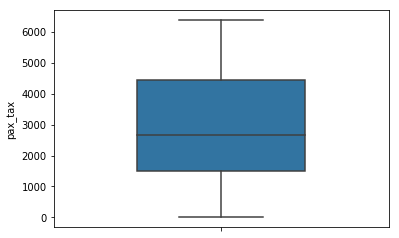

In [61]:
#箱型图
fig = plt.figure(figsize=(6, 4))  # 指定绘图对象宽度和高度
sns.boxplot(train_data['pax_tax'],orient="v", width=0.5)

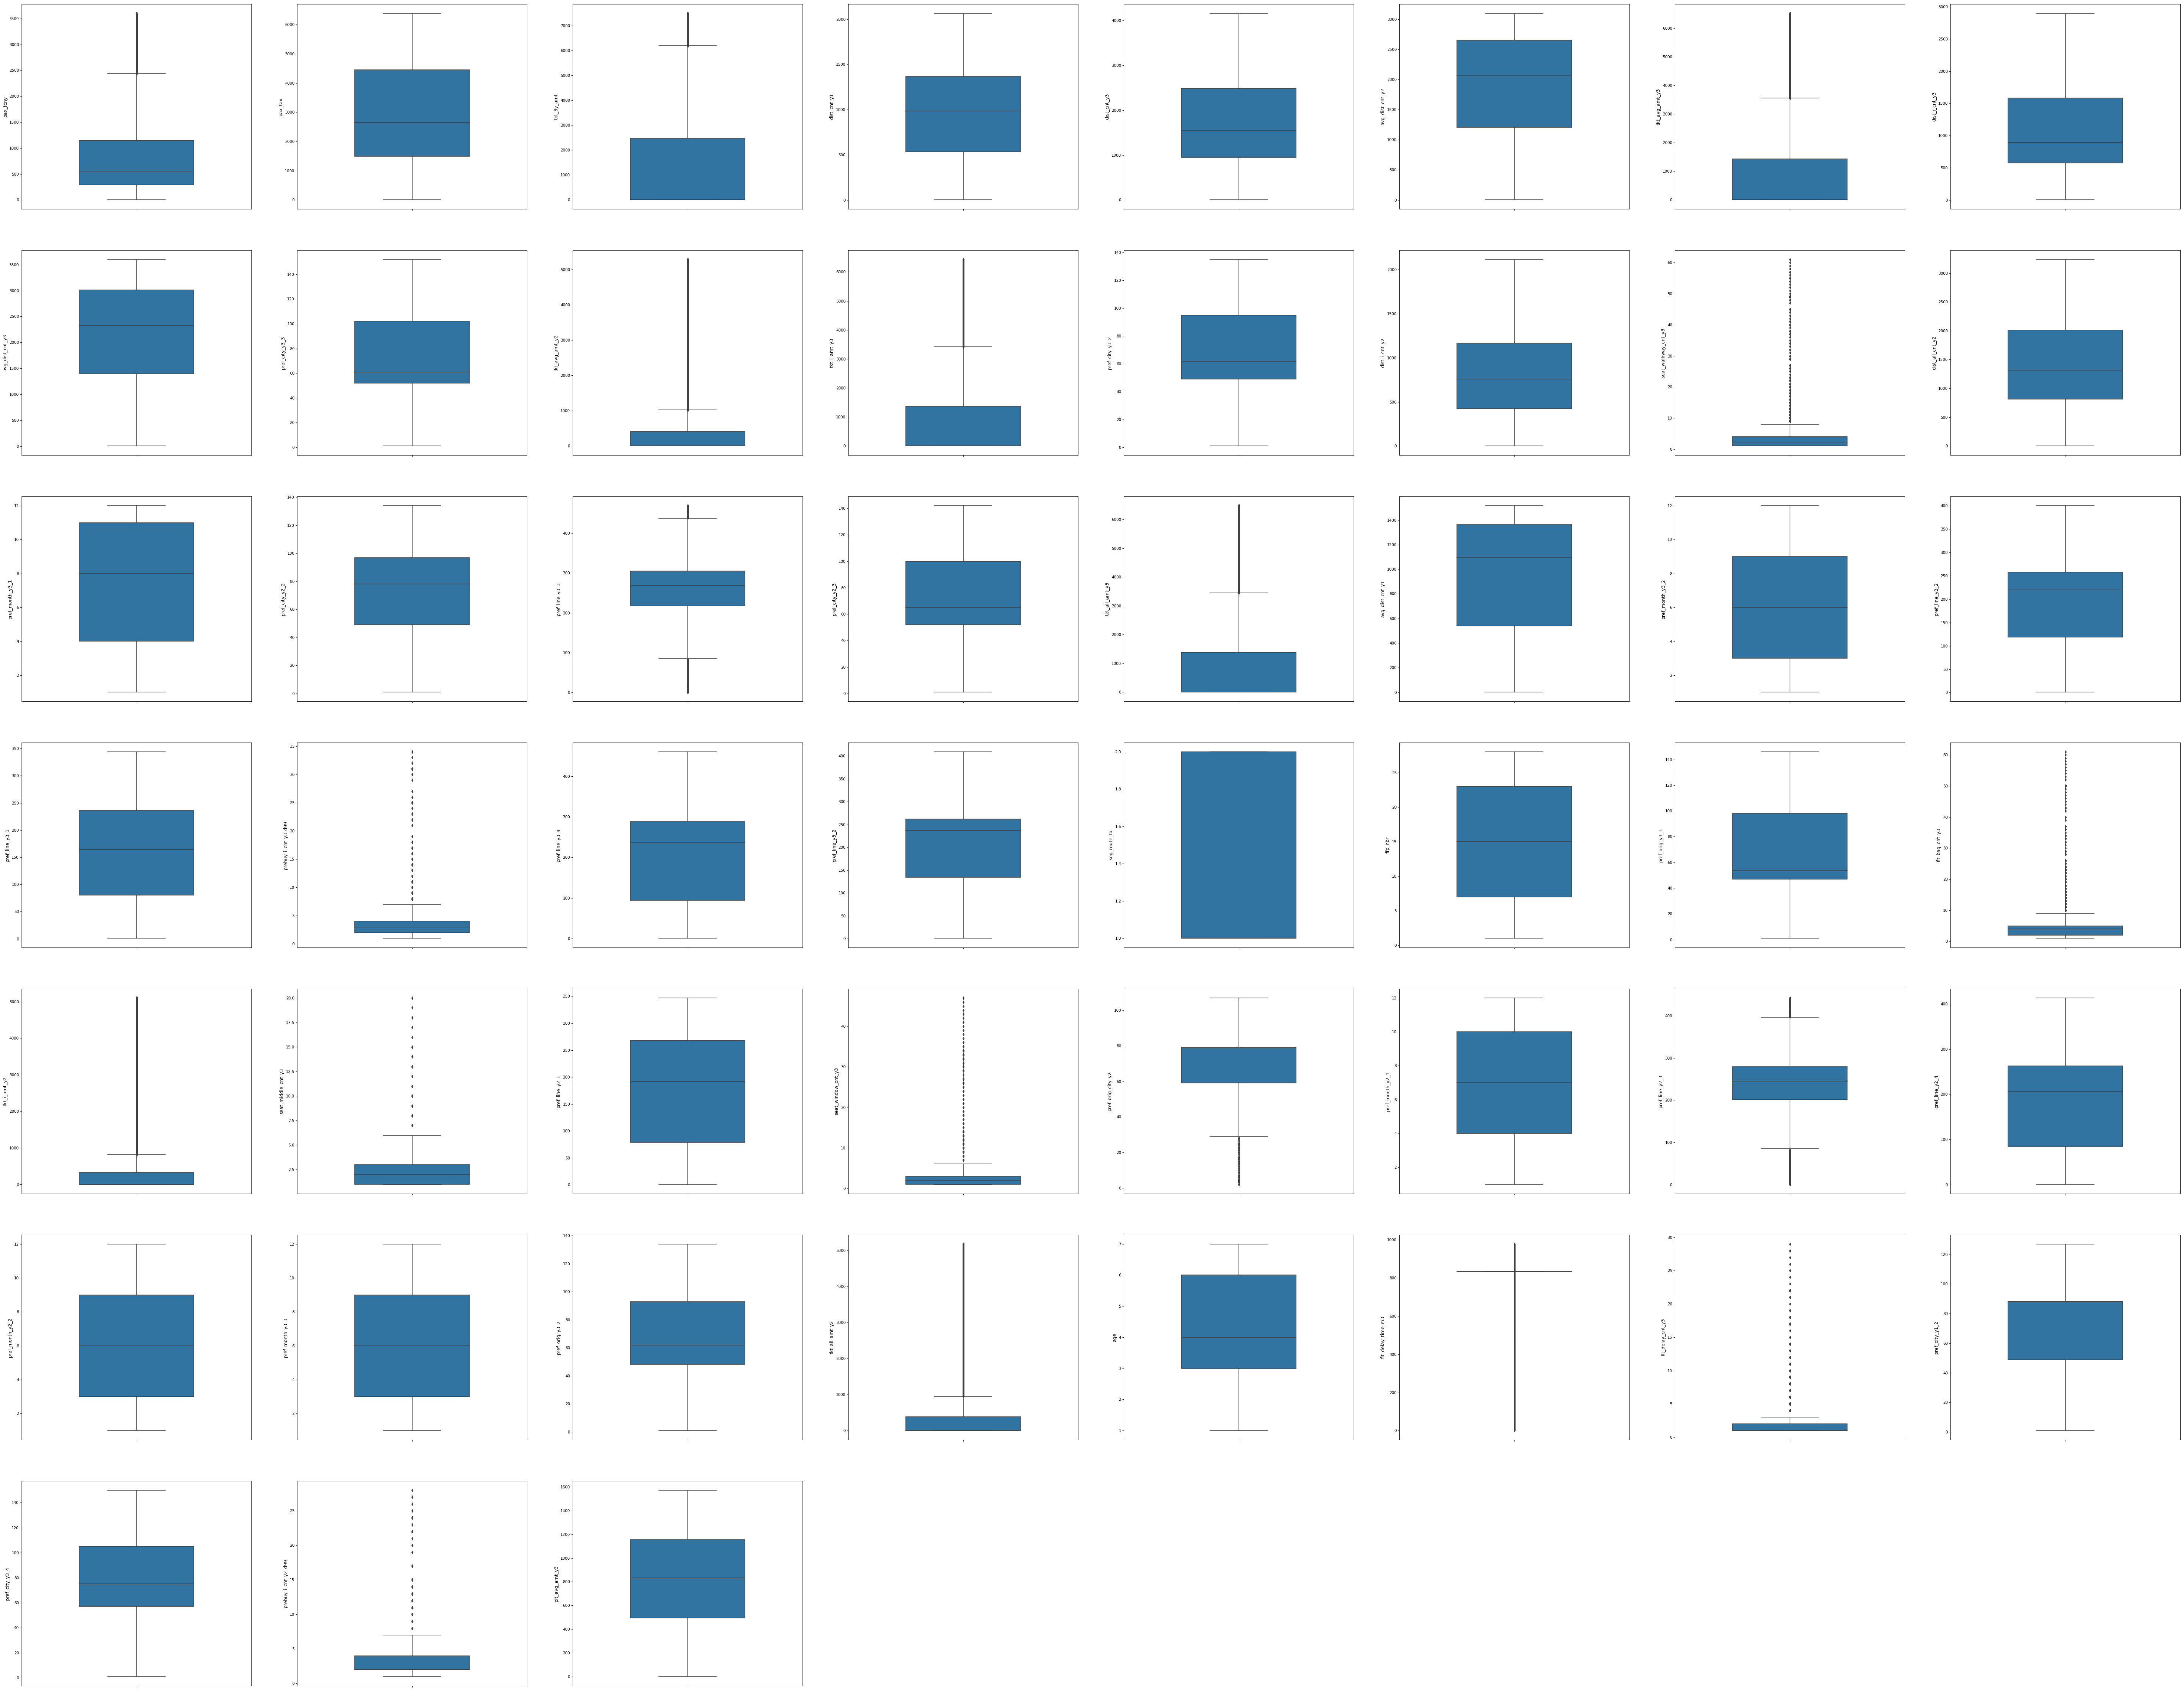

In [62]:
#所有的箱型图
column = train_data.columns.tolist()[:51]  # 列表头
#print(column)
fig = plt.figure(figsize=(100, 80), dpi=75)  # 指定绘图对象宽度和高度
for i in range(51):
    plt.subplot(7, 8, i + 1)  # 13行3列子图
    sns.boxplot(train_data[column[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=12)
plt.show()

(23342,)


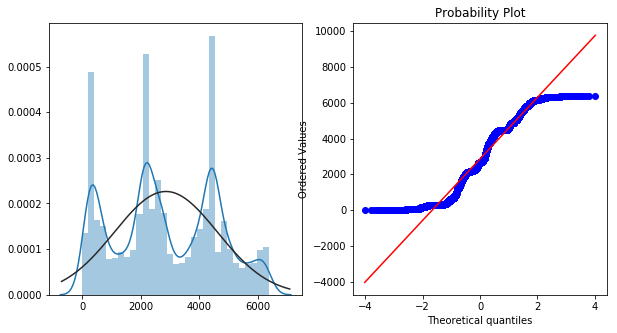

In [63]:
#直方图和Q-Q图
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
List = train_data['pax_tax']
List2 = []
for i in List:
    if i == i:
        List2.append(i)
        
List2 = np.array(List2)
print(List2.shape)
sns.distplot(List2,fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(List2, plot=plt)

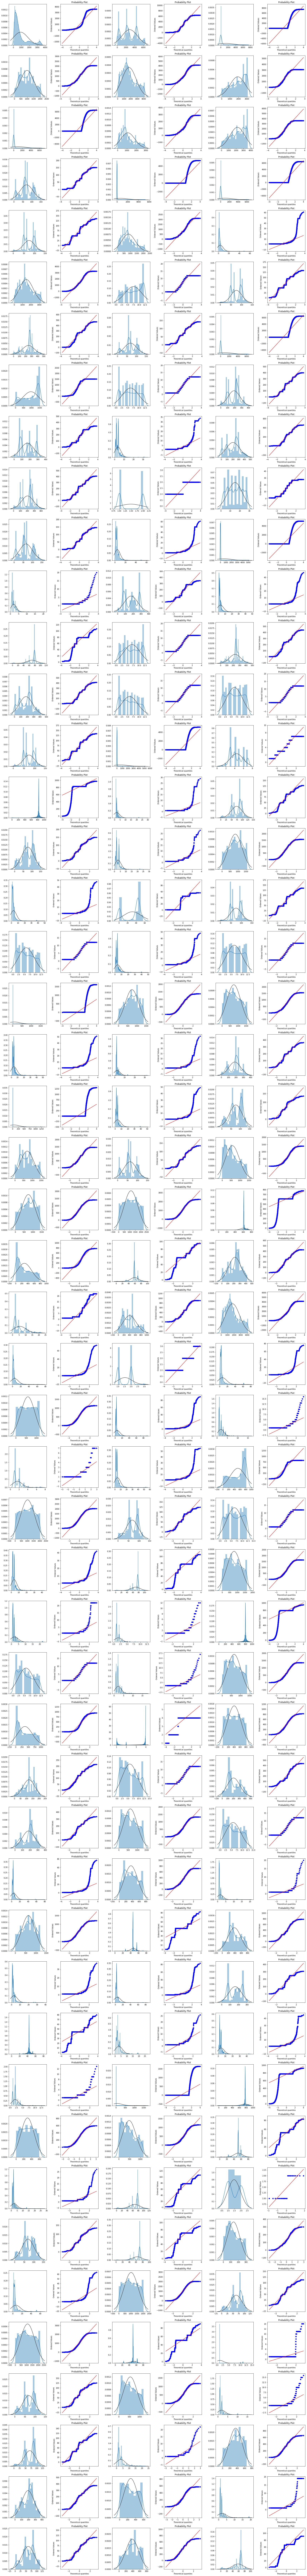

In [64]:
#所有变量的直方图和Q-Q图
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols,4*train_rows))

i=0
for col in train_data.columns:
    if col in ['pax_name','pax_passport','emd_lable2','emd_lable']:
        continue
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    List = train_data[col]
    List2 = []
    for k in List:
        if k == k:
            List2.append(k)
        
    List2 = np.array(List2)
#     print(List2.shape)
    sns.distplot(List2,fit=stats.norm)
#     sns.distplot(train_data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(List2, plot=plt)
plt.tight_layout()
plt.show()

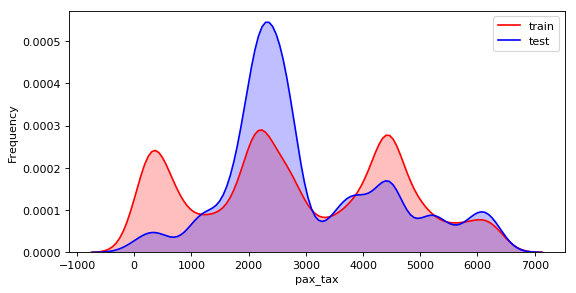

In [65]:
plt.figure(figsize=(8,4),dpi=80)
ax = sns.kdeplot(train_data['pax_tax'], color="Red", shade=True)
ax = sns.kdeplot(test_data['pax_tax'], color="Blue", shade=True)
ax.set_xlabel('pax_tax')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

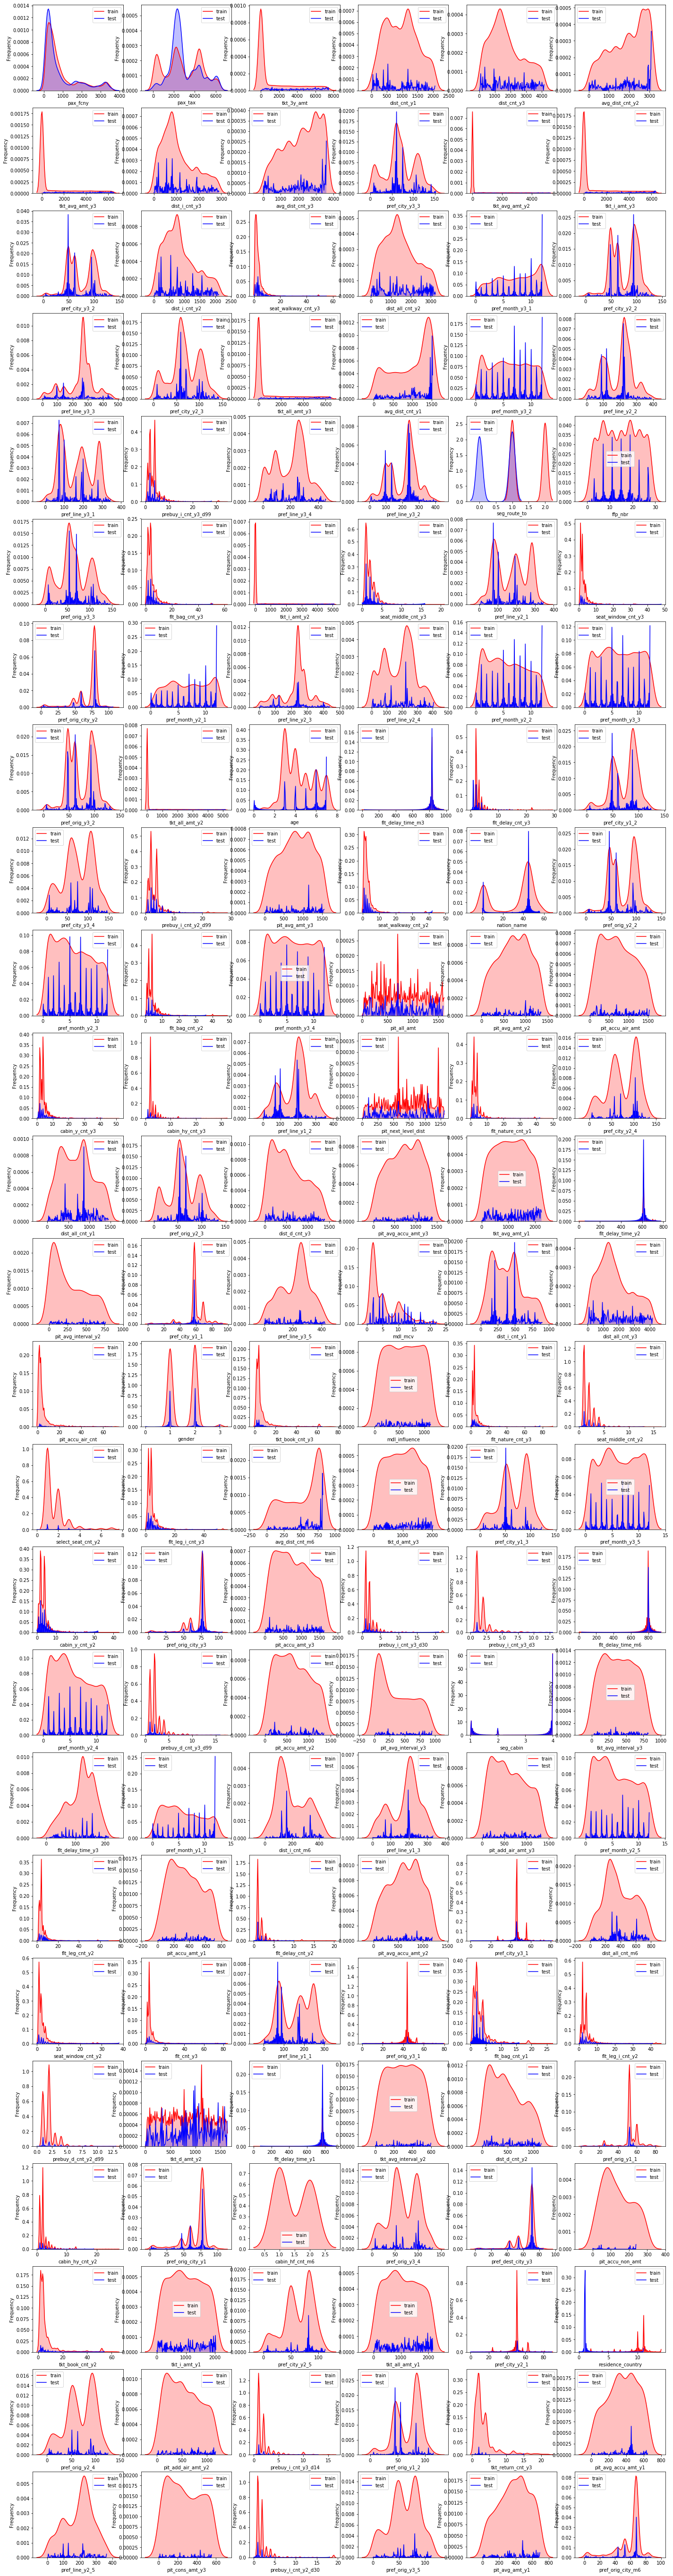

In [66]:
#KDE核密度分布

dist_cols = 6
dist_rows = len(train_data.columns)
plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))

i = 1
for col in train_data.columns  :
    if col in ['pax_name','pax_passport','emd_lable2','emd_lable']:
        continue
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])

    i += 1
plt.show()